In [2]:
# %load ../uoicorr_imports.py
%load_ext autoreload
%autoreload 2

import h5py

import numpy as np
import matplotlib.pyplot as plt

import sys, os, pdb

# Hack to import pyuoi
parent_path, current_dir = os.path.split(os.path.abspath('.'))
while current_dir not in ['nse']:
    parent_path, current_dir = os.path.split(parent_path)
p = os.path.join(parent_path, current_dir)
# Add analysis
if p not in sys.path:
    sys.path.append(p)

import subprocess
hname = subprocess.check_output('hostname')

if 'ankitnse'.encode() in hname:

    if '%s/uoicorr' % p not in sys.path:
        sys.path.append('%s/uoicorr' % p)
    if '%s/PyUoI' % p not in sys.path:
        sys.path.append('%s/PyUoI' % p)

else:
    # And standard list of subdirectories
    if '%s\\pyuoi' % p not in sys.path:
        sys.path.append('%s\\pyuoi' % p)
    if '%s\\uoicorr' % p not in sys.path:
        sys.path.append('%s\\uoicorr' % p)

from postprocess import postprocess_file, postprocess_dir

In [3]:
from utils import FPR, FNR, selection_accuracy

In [4]:
data = postprocess_dir('C:\\Users\\akumar\\nse\\uoicorr\\data\\01222019')

(0, 0)


In [8]:
uoien = data.loc[data['exp_type'] == 'UoIElasticNet']
uoil = data.loc[data['exp_type'] == 'UoILasso']
en = data.loc[data['exp_type'] == 'EN']

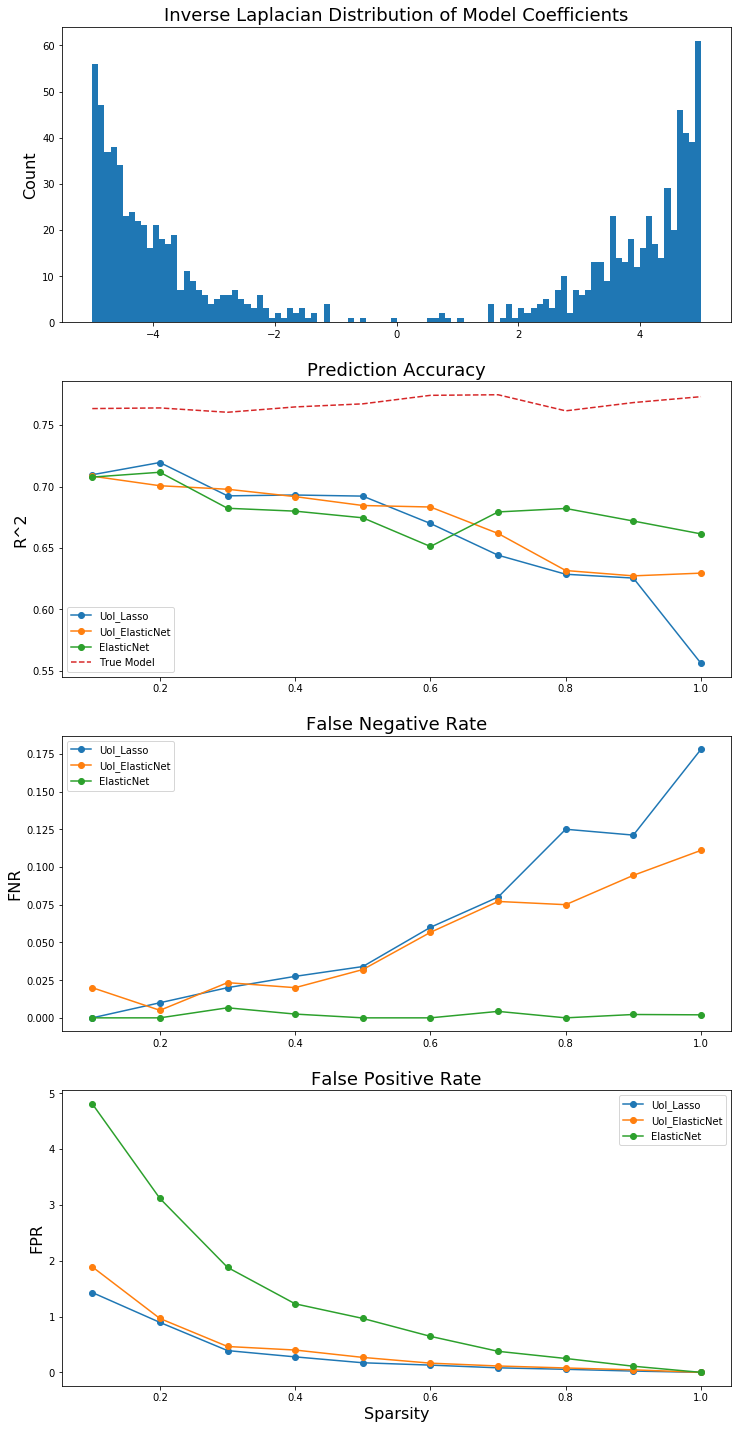

In [24]:
# Plot prediction accuracy, selection accuracy, estimation error

# Need to understand estimation error and run more simulations for estimation variability 
fig, ax = plt.subplots(4, 1, figsize = (12, 25))

full = data.loc[data['sparsity'] == 1].iloc[0]
ax[0].hist(full.betas.ravel(), bins = 100)
ax[0].set_ylabel('Count', fontsize = 16)
ax[0].set_title('Inverse Laplacian Distribution of Model Coefficients', fontsize = 18)
#  Prediction accuracy (R^2)
r2_uoien = [uoien.iloc[i].r2[0] for i in range(10)]
r2_uoil = [uoil.iloc[i].r2[0] for i in range(10)]
r2_en = [en.iloc[i].r2[0] for i in range(10)]

r2_true = [uoien.iloc[i].r2_true[0] for i in range(10)]

sparsity = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

# Selection Accuracy

# Properly define the false negative rate as the proportion of false negatives over the number of true model parameters

# Correspondingly, the false positive rate is the proportion of false positives over the number of absent prameters in
# the true model       

fn_uoien = [uoien.iloc[i].fn[0]/(sparsity[i] * 1000) for i in range(10)]
fn_uoil = [uoil.iloc[i].fn[0]/(sparsity[i] * 1000) for i in range(10)]
fn_en = [en.iloc[i].fn[0]/(sparsity[i] * 1000) for i in range(10)]

fp_uoien = [uoien.iloc[i].fp[0]/(sparsity[i] * 1000) for i in range(10)]
fp_uoil = [uoil.iloc[i].fp[0]/(sparsity[i] * 1000) for i in range(10)]
fp_en = [en.iloc[i].fp[0]/(sparsity[i] * 1000) for i in range(10)]

ax[1].plot(sparsity, r2_uoil, '-o')
ax[1].plot(sparsity, r2_uoien, '-o')
ax[1].plot(sparsity, r2_en, '-o')
ax[1].plot(sparsity, r2_true, '--')
ax[1].set_title('Prediction Accuracy', fontsize = 18)
ax[1].set_ylabel('R^2', fontsize = 16)
ax[1].legend(['UoI_Lasso', 'UoI_ElasticNet', 'ElasticNet', 'True Model'])


ax[2].plot(sparsity, fn_uoil, '-o')
ax[2].plot(sparsity, fn_uoien, '-o')
ax[2].plot(sparsity, fn_en, '-o')
ax[2].set_title('False Negative Rate', fontsize = 18)
ax[2].set_ylabel('FNR', fontsize = 16)
ax[2].legend(['UoI_Lasso', 'UoI_ElasticNet', 'ElasticNet'])



ax[3].plot(sparsity, fp_uoil, '-o')
ax[3].plot(sparsity, fp_uoien, '-o')
ax[3].plot(sparsity, fp_en, '-o')
ax[3].set_title('False Positive Rate', fontsize = 18)
ax[3].set_xlabel('Sparsity', fontsize = 16)
ax[3].set_ylabel('FPR', fontsize = 16)
ax[3].legend(['UoI_Lasso', 'UoI_ElasticNet', 'ElasticNet'])

plt.savefig('..\\figs\\revisions\\benchmark.png')